In [77]:
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib as plt
import tensorflow as tf

In [78]:
door_open1 = pd.read_csv("Documents/Project 1/Veriseti1.txt")
door_open2 = pd.read_csv("Documents/Project 1/Veriseti2.txt")
door_closed = pd.read_csv("Documents/Project 1/Veriseti3.txt")

<AxesSubplot:>

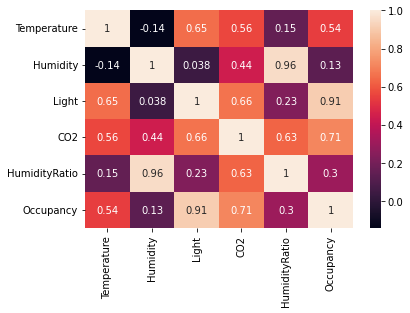

In [79]:
#correlation matrix in order to see relationships in dataframes
door_open1.corr()
sn.heatmap(door_open1.corr(),annot=True)

<AxesSubplot:>

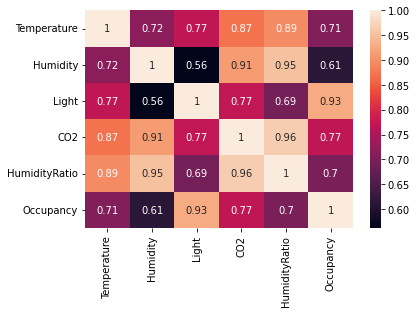

In [80]:
door_open2.corr()
sn.heatmap(door_open2.corr(),annot=True)

<AxesSubplot:>

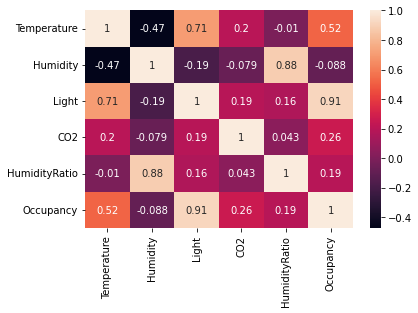

In [81]:
door_closed.corr()
sn.heatmap(door_closed.corr(),annot=True)

In [82]:
#adding new feature by using existing ones
#Air Ratio found by dividing humidity by humidity ratio and then CO2 is divided by air amount.
#I though this may help because people produce CO2
door_open1['AirCO2Ratio'] = door_open1.apply (lambda row: row.CO2/(row.Humidity/row.HumidityRatio), axis=1)
door_open2['AirCO2Ratio'] = door_open2.apply (lambda row: row.CO2/(row.Humidity/row.HumidityRatio), axis=1)
door_closed['AirCO2Ratio'] = door_closed.apply (lambda row: row.CO2/(row.Humidity/row.HumidityRatio), axis=1)

In [83]:
door_open1

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,AirCO2Ratio
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1,0.126758
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1,0.125254
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1,0.125166
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1,0.124243
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1,0.123210
...,...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1,0.121666
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1,0.122011
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1,0.123788
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1,0.127178


In [84]:
door_open2

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,AirCO2Ratio
140,2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1,0.135860
141,2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1,0.138042
142,2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1,0.139824
143,2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1,0.140679
144,2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1,0.141724
...,...,...,...,...,...,...,...,...
2800,2015-02-04 10:38:59,24.290000,25.700000,808.000000,1150.250000,0.004829,1,0.216134
2801,2015-02-04 10:40:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1,0.212694
2802,2015-02-04 10:40:59,24.330000,25.700000,817.000000,1125.800000,0.004841,1,0.212052
2803,2015-02-04 10:41:59,24.356667,25.700000,813.000000,1123.000000,0.004849,1,0.211865


In [85]:
door_closed

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,AirCO2Ratio
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1,0.166059
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1,0.161567
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1,0.161954
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1,0.162881
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1,0.162488
...,...,...,...,...,...,...,...,...
9748,2015-02-18 09:15:00,20.8150,27.717500,429.750000,1505.250000,0.004213,1,0.228793
9749,2015-02-18 09:16:00,20.8650,27.745000,423.500000,1514.500000,0.004230,1,0.230915
9750,2015-02-18 09:16:59,20.8900,27.745000,423.500000,1521.500000,0.004237,1,0.232342
9751,2015-02-18 09:17:59,20.8900,28.022500,418.750000,1632.000000,0.004279,1,0.249233


In [86]:
door_open=pd.concat([door_open1,door_open2],ignore_index=True)

In [87]:
y_train=door_open["Occupancy"]
door_open.drop("Occupancy",inplace=True, axis=1)
door_open

,date,Temperature,Humidity,Light,CO2,HumidityRatio,AirCO2Ratio
0,2015-02-04 17:51:00,23.180000,27.272000,426.0,721.25,0.004793,0.126758
1,2015-02-04 17:51:59,23.150000,27.267500,429.5,714.00,0.004783,0.125254
2,2015-02-04 17:53:00,23.150000,27.245000,426.0,713.50,0.004779,0.125166
3,2015-02-04 17:54:00,23.150000,27.200000,426.0,708.25,0.004772,0.124243
4,2015-02-04 17:55:00,23.100000,27.200000,426.0,704.50,0.004757,0.123210
...,...,...,...,...,...,...,...
10803,2015-02-04 10:38:59,24.290000,25.700000,808.0,1150.25,0.004829,0.216134
10804,2015-02-04 10:40:00,24.330000,25.736000,809.8,1129.20,0.004848,0.212694
10805,2015-02-04 10:40:59,24.330000,25.700000,817.0,1125.80,0.004841,0.212052
10806,2015-02-04 10:41:59,24.356667,25.700000,813.0,1123.00,0.004849,0.211865


In [163]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [99]:
#Data split
features=['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio','AirCO2Ratio']
X_train=door_open[features].values
X_test=door_closed[features].values
y_test=door_closed["Occupancy"]

In [138]:
#create model and train as my suggestion of best hyperparameters
rf = RandomForestClassifier(max_depth=3, n_estimators=10, max_samples=0.45,
                             max_features=.8, random_state=2)
rf.fit(X_train, y_train)
preds = rf.predict(X_test)

In [165]:
#test
acc=accuracy_score(y_true=y_test, y_pred=preds)
mae=mean_absolute_error(y_true=y_test, y_pred=preds)
f1=f1_score(y_true=y_test, y_pred=preds)
print("Accuracy Score: ", acc)
print("Mean Absolute Error: ", mae)
print("F1 Score: ", f1)

Accuracy Score:  0.9932321575061526
Mean Absolute Error:  0.006767842493847416
F1 Score:  0.9840579710144928


<AxesSubplot:>

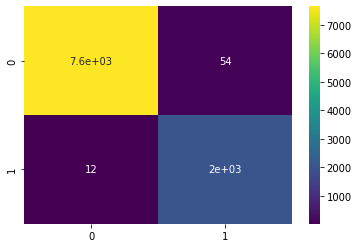

In [155]:
cnfm = confusion_matrix(y_true=y_test, y_pred=preds)
sn.heatmap(cnfm, annot=True, cmap="viridis")

In [171]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
rf_hs = RandomForestClassifier()

params_df = {"max_depth":range(1,20,1),
             "max_samples": [.4,.7,1],
             "max_features": [.4, .7,1],
             "n_estimators": range(1,15,1)}

grid_rf = GridSearchCV(estimator=rf_hs, param_grid=params_df, cv=5, verbose=2)
grid_rf.fit(X=X_train, y=y_train)

Fitting 5 folds for each of 2394 candidates, totalling 11970 fits
[CV] END max_depth=1, max_features=0.4, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=1, max_features=0.4, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=1, max_features=0.4, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=1, max_features=0.4, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=1, max_features=0.4, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=1, max_features=0.4, max_samples=0.4, n_estimators=2; total time=   0.0s
[CV] END max_depth=1, max_features=0.4, max_samples=0.4, n_estimators=2; total time=   0.0s
[CV] END max_depth=1, max_features=0.4, max_samples=0.4, n_estimators=2; total time=   0.0s
[CV] END max_depth=1, max_features=0.4, max_samples=0.4, n_estimators=2; total time=   0.0s
[CV] END max_depth=1, max_features=0.4, max_samples=0.4, n_estimators=2; total time=   0.0s
[CV] END max_d

[CV] END max_depth=1, max_features=0.4, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=1, max_features=0.4, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=1, max_features=0.4, max_samples=0.7, n_estimators=6; total time=   0.0s
[CV] END max_depth=1, max_features=0.4, max_samples=0.7, n_estimators=6; total time=   0.0s
[CV] END max_depth=1, max_features=0.4, max_samples=0.7, n_estimators=6; total time=   0.0s
[CV] END max_depth=1, max_features=0.4, max_samples=0.7, n_estimators=6; total time=   0.0s
[CV] END max_depth=1, max_features=0.4, max_samples=0.7, n_estimators=6; total time=   0.0s
[CV] END max_depth=1, max_features=0.4, max_samples=0.7, n_estimators=7; total time=   0.0s
[CV] END max_depth=1, max_features=0.4, max_samples=0.7, n_estimators=7; total time=   0.0s
[CV] END max_depth=1, max_features=0.4, max_samples=0.7, n_estimators=7; total time=   0.0s
[CV] END max_depth=1, max_features=0.4, max_samples=0.7, n_estimators=7; total t

[CV] END max_depth=1, max_features=0.4, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=1, max_features=0.4, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=1, max_features=0.4, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=1, max_features=0.4, max_samples=1, n_estimators=12; total time=   0.0s
[CV] END max_depth=1, max_features=0.4, max_samples=1, n_estimators=12; total time=   0.0s
[CV] END max_depth=1, max_features=0.4, max_samples=1, n_estimators=12; total time=   0.0s
[CV] END max_depth=1, max_features=0.4, max_samples=1, n_estimators=12; total time=   0.0s
[CV] END max_depth=1, max_features=0.4, max_samples=1, n_estimators=12; total time=   0.0s
[CV] END max_depth=1, max_features=0.4, max_samples=1, n_estimators=13; total time=   0.0s
[CV] END max_depth=1, max_features=0.4, max_samples=1, n_estimators=13; total time=   0.0s
[CV] END max_depth=1, max_features=0.4, max_samples=1, n_estimators=13; total time=   0.0s

[CV] END max_depth=1, max_features=0.7, max_samples=0.7, n_estimators=4; total time=   0.0s
[CV] END max_depth=1, max_features=0.7, max_samples=0.7, n_estimators=4; total time=   0.0s
[CV] END max_depth=1, max_features=0.7, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=1, max_features=0.7, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=1, max_features=0.7, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=1, max_features=0.7, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=1, max_features=0.7, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=1, max_features=0.7, max_samples=0.7, n_estimators=6; total time=   0.0s
[CV] END max_depth=1, max_features=0.7, max_samples=0.7, n_estimators=6; total time=   0.0s
[CV] END max_depth=1, max_features=0.7, max_samples=0.7, n_estimators=6; total time=   0.0s
[CV] END max_depth=1, max_features=0.7, max_samples=0.7, n_estimators=6; total t

[CV] END max_depth=1, max_features=0.7, max_samples=1, n_estimators=9; total time=   0.0s
[CV] END max_depth=1, max_features=0.7, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=1, max_features=0.7, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=1, max_features=0.7, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=1, max_features=0.7, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=1, max_features=0.7, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=1, max_features=0.7, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=1, max_features=0.7, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=1, max_features=0.7, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=1, max_features=0.7, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=1, max_features=0.7, max_samples=1, n_estimators=11; total time=   0.0s


[CV] END max_depth=1, max_features=1, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=1, max_features=1, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=1, max_features=1, max_samples=0.7, n_estimators=2; total time=   0.0s
[CV] END max_depth=1, max_features=1, max_samples=0.7, n_estimators=2; total time=   0.0s
[CV] END max_depth=1, max_features=1, max_samples=0.7, n_estimators=2; total time=   0.0s
[CV] END max_depth=1, max_features=1, max_samples=0.7, n_estimators=2; total time=   0.0s
[CV] END max_depth=1, max_features=1, max_samples=0.7, n_estimators=2; total time=   0.0s
[CV] END max_depth=1, max_features=1, max_samples=0.7, n_estimators=3; total time=   0.0s
[CV] END max_depth=1, max_features=1, max_samples=0.7, n_estimators=3; total time=   0.0s
[CV] END max_depth=1, max_features=1, max_samples=0.7, n_estimators=3; total time=   0.0s
[CV] END max_depth=1, max_features=1, max_samples=0.7, n_estimators=3; total time=   0.0s
[CV] END m

[CV] END max_depth=1, max_features=1, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=1, max_features=1, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=1, max_features=1, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=1, max_features=1, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=1, max_features=1, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=1, max_features=1, max_samples=1, n_estimators=9; total time=   0.0s
[CV] END max_depth=1, max_features=1, max_samples=1, n_estimators=9; total time=   0.0s
[CV] END max_depth=1, max_features=1, max_samples=1, n_estimators=9; total time=   0.0s
[CV] END max_depth=1, max_features=1, max_samples=1, n_estimators=9; total time=   0.0s
[CV] END max_depth=1, max_features=1, max_samples=1, n_estimators=9; total time=   0.0s
[CV] END max_depth=1, max_features=1, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=1, max_featu

[CV] END max_depth=2, max_features=0.4, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=2, max_features=0.4, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=2, max_features=0.4, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=2, max_features=0.4, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=2, max_features=0.4, max_samples=0.4, n_estimators=13; total time=   0.0s
[CV] END max_depth=2, max_features=0.4, max_samples=0.4, n_estimators=13; total time=   0.0s
[CV] END max_depth=2, max_features=0.4, max_samples=0.4, n_estimators=13; total time=   0.0s
[CV] END max_depth=2, max_features=0.4, max_samples=0.4, n_estimators=13; total time=   0.0s
[CV] END max_depth=2, max_features=0.4, max_samples=0.4, n_estimators=13; total time=   0.0s
[CV] END max_depth=2, max_features=0.4, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=2, max_features=0.4, max_samples=0.4, n_estimators=

[CV] END max_depth=2, max_features=0.4, max_samples=1, n_estimators=3; total time=   0.0s
[CV] END max_depth=2, max_features=0.4, max_samples=1, n_estimators=3; total time=   0.0s
[CV] END max_depth=2, max_features=0.4, max_samples=1, n_estimators=4; total time=   0.0s
[CV] END max_depth=2, max_features=0.4, max_samples=1, n_estimators=4; total time=   0.0s
[CV] END max_depth=2, max_features=0.4, max_samples=1, n_estimators=4; total time=   0.0s
[CV] END max_depth=2, max_features=0.4, max_samples=1, n_estimators=4; total time=   0.0s
[CV] END max_depth=2, max_features=0.4, max_samples=1, n_estimators=4; total time=   0.0s
[CV] END max_depth=2, max_features=0.4, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=2, max_features=0.4, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=2, max_features=0.4, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=2, max_features=0.4, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END m

[CV] END max_depth=2, max_features=0.7, max_samples=0.4, n_estimators=8; total time=   0.0s
[CV] END max_depth=2, max_features=0.7, max_samples=0.4, n_estimators=8; total time=   0.0s
[CV] END max_depth=2, max_features=0.7, max_samples=0.4, n_estimators=8; total time=   0.0s
[CV] END max_depth=2, max_features=0.7, max_samples=0.4, n_estimators=9; total time=   0.0s
[CV] END max_depth=2, max_features=0.7, max_samples=0.4, n_estimators=9; total time=   0.0s
[CV] END max_depth=2, max_features=0.7, max_samples=0.4, n_estimators=9; total time=   0.0s
[CV] END max_depth=2, max_features=0.7, max_samples=0.4, n_estimators=9; total time=   0.0s
[CV] END max_depth=2, max_features=0.7, max_samples=0.4, n_estimators=9; total time=   0.0s
[CV] END max_depth=2, max_features=0.7, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=0.7, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=0.7, max_samples=0.4, n_estimators=10; tota

[CV] END max_depth=2, max_features=0.7, max_samples=0.7, n_estimators=12; total time=   0.0s
[CV] END max_depth=2, max_features=0.7, max_samples=0.7, n_estimators=12; total time=   0.0s
[CV] END max_depth=2, max_features=0.7, max_samples=0.7, n_estimators=13; total time=   0.0s
[CV] END max_depth=2, max_features=0.7, max_samples=0.7, n_estimators=13; total time=   0.0s
[CV] END max_depth=2, max_features=0.7, max_samples=0.7, n_estimators=13; total time=   0.0s
[CV] END max_depth=2, max_features=0.7, max_samples=0.7, n_estimators=13; total time=   0.0s
[CV] END max_depth=2, max_features=0.7, max_samples=0.7, n_estimators=13; total time=   0.0s
[CV] END max_depth=2, max_features=0.7, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=2, max_features=0.7, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=2, max_features=0.7, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=2, max_features=0.7, max_samples=0.7, n_estimators=

[CV] END max_depth=2, max_features=1, max_samples=0.4, n_estimators=4; total time=   0.0s
[CV] END max_depth=2, max_features=1, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=2, max_features=1, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=2, max_features=1, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=2, max_features=1, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=2, max_features=1, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=2, max_features=1, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=2, max_features=1, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=2, max_features=1, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=2, max_features=1, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=2, max_features=1, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END m

[CV] END max_depth=2, max_features=1, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=2, max_features=1, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=2, max_features=1, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=2, max_features=1, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=1, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=1, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=1, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=1, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=1, max_samples=0.7, n_estimators=11; total time=   0.0s
[CV] END max_depth=2, max_features=1, max_samples=0.7, n_estimators=11; total time=   0.0s
[CV] END max_depth=2, max_features=1, max_samples=0.7, n_estimators=11; total time=   0.0s
[C

[CV] END max_depth=2, max_features=1, max_samples=1, n_estimators=13; total time=   0.0s
[CV] END max_depth=2, max_features=1, max_samples=1, n_estimators=14; total time=   0.0s
[CV] END max_depth=2, max_features=1, max_samples=1, n_estimators=14; total time=   0.0s
[CV] END max_depth=2, max_features=1, max_samples=1, n_estimators=14; total time=   0.0s
[CV] END max_depth=2, max_features=1, max_samples=1, n_estimators=14; total time=   0.0s
[CV] END max_depth=2, max_features=1, max_samples=1, n_estimators=14; total time=   0.0s
[CV] END max_depth=3, max_features=0.4, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=3, max_features=0.4, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=3, max_features=0.4, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=3, max_features=0.4, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=3, max_features=0.4, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] E

[CV] END max_depth=3, max_features=0.4, max_samples=0.7, n_estimators=4; total time=   0.0s
[CV] END max_depth=3, max_features=0.4, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=3, max_features=0.4, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=3, max_features=0.4, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=3, max_features=0.4, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=3, max_features=0.4, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=3, max_features=0.4, max_samples=0.7, n_estimators=6; total time=   0.0s
[CV] END max_depth=3, max_features=0.4, max_samples=0.7, n_estimators=6; total time=   0.0s
[CV] END max_depth=3, max_features=0.4, max_samples=0.7, n_estimators=6; total time=   0.0s
[CV] END max_depth=3, max_features=0.4, max_samples=0.7, n_estimators=6; total time=   0.0s
[CV] END max_depth=3, max_features=0.4, max_samples=0.7, n_estimators=6; total t

[CV] END max_depth=3, max_features=0.4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=0.4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=0.4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=0.4, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=3, max_features=0.4, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=3, max_features=0.4, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=3, max_features=0.4, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=3, max_features=0.4, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=3, max_features=0.4, max_samples=1, n_estimators=12; total time=   0.0s
[CV] END max_depth=3, max_features=0.4, max_samples=1, n_estimators=12; total time=   0.0s
[CV] END max_depth=3, max_features=0.4, max_samples=1, n_estimators=12; total time=   0.0s

[CV] END max_depth=3, max_features=0.7, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=3, max_features=0.7, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=3, max_features=0.7, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=3, max_features=0.7, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=3, max_features=0.7, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=3, max_features=0.7, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=3, max_features=0.7, max_samples=0.7, n_estimators=2; total time=   0.0s
[CV] END max_depth=3, max_features=0.7, max_samples=0.7, n_estimators=2; total time=   0.0s
[CV] END max_depth=3, max_features=0.7, max_samples=0.7, n_estimators=2; total time=   0.0s
[CV] END max_depth=3, max_features=0.7, max_samples=0.7, n_estimators=2; total time=   0.0s
[CV] END max_depth=3, max_features=0.7, max_samples=0.7, n_estimators=2; total 

[CV] END max_depth=3, max_features=0.7, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=3, max_features=0.7, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=3, max_features=0.7, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=3, max_features=0.7, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=3, max_features=0.7, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=3, max_features=0.7, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=3, max_features=0.7, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=3, max_features=0.7, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=3, max_features=0.7, max_samples=1, n_estimators=9; total time=   0.0s
[CV] END max_depth=3, max_features=0.7, max_samples=1, n_estimators=9; total time=   0.0s
[CV] END max_depth=3, max_features=0.7, max_samples=1, n_estimators=9; total time=   0.0s
[CV] END m

[CV] END max_depth=3, max_features=1, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=3, max_features=1, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=3, max_features=1, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=3, max_features=1, max_samples=0.4, n_estimators=13; total time=   0.0s
[CV] END max_depth=3, max_features=1, max_samples=0.4, n_estimators=13; total time=   0.0s
[CV] END max_depth=3, max_features=1, max_samples=0.4, n_estimators=13; total time=   0.0s
[CV] END max_depth=3, max_features=1, max_samples=0.4, n_estimators=13; total time=   0.0s
[CV] END max_depth=3, max_features=1, max_samples=0.4, n_estimators=13; total time=   0.0s
[CV] END max_depth=3, max_features=1, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=3, max_features=1, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=3, max_features=1, max_samples=0.4, n_estimators=14; total time=   0.0s

[CV] END max_depth=3, max_features=1, max_samples=1, n_estimators=4; total time=   0.0s
[CV] END max_depth=3, max_features=1, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=3, max_features=1, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=3, max_features=1, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=3, max_features=1, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=3, max_features=1, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=3, max_features=1, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=3, max_features=1, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=3, max_features=1, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=3, max_features=1, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=3, max_features=1, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=3, max_featur

[CV] END max_depth=4, max_features=0.4, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=4, max_features=0.4, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=4, max_features=0.4, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=4, max_features=0.4, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=4, max_features=0.4, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=4, max_features=0.4, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=4, max_features=0.4, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=4, max_features=0.4, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=4, max_features=0.4, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=4, max_features=0.4, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=4, max_features=0.4, max_samples=0.4, n_estimators=

[CV] END max_depth=4, max_features=0.4, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=4, max_features=0.4, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=4, max_features=0.4, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=4, max_features=0.4, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=4, max_features=0.4, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=4, max_features=0.4, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=4, max_features=0.4, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=4, max_features=0.4, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=4, max_features=0.4, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=4, max_features=0.4, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=4, max_features=0.4, max_samples=1, n_estimators=2; total time=   

[CV] END max_depth=4, max_features=0.7, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=4, max_features=0.7, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=4, max_features=0.7, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=4, max_features=0.7, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=4, max_features=0.7, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=4, max_features=0.7, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=4, max_features=0.7, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=4, max_features=0.7, max_samples=0.4, n_estimators=7; total time=   0.0s
[CV] END max_depth=4, max_features=0.7, max_samples=0.4, n_estimators=7; total time=   0.0s
[CV] END max_depth=4, max_features=0.7, max_samples=0.4, n_estimators=7; total time=   0.0s
[CV] END max_depth=4, max_features=0.7, max_samples=0.4, n_estimators=7; total t

[CV] END max_depth=4, max_features=0.7, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=4, max_features=0.7, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=4, max_features=0.7, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=4, max_features=0.7, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=4, max_features=0.7, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=4, max_features=0.7, max_samples=0.7, n_estimators=11; total time=   0.0s
[CV] END max_depth=4, max_features=0.7, max_samples=0.7, n_estimators=11; total time=   0.0s
[CV] END max_depth=4, max_features=0.7, max_samples=0.7, n_estimators=11; total time=   0.0s
[CV] END max_depth=4, max_features=0.7, max_samples=0.7, n_estimators=11; total time=   0.0s
[CV] END max_depth=4, max_features=0.7, max_samples=0.7, n_estimators=11; total time=   0.0s
[CV] END max_depth=4, max_features=0.7, max_samples=0.7, n_estimators=

[CV] END max_depth=4, max_features=1, max_samples=0.4, n_estimators=3; total time=   0.0s
[CV] END max_depth=4, max_features=1, max_samples=0.4, n_estimators=3; total time=   0.0s
[CV] END max_depth=4, max_features=1, max_samples=0.4, n_estimators=3; total time=   0.0s
[CV] END max_depth=4, max_features=1, max_samples=0.4, n_estimators=3; total time=   0.0s
[CV] END max_depth=4, max_features=1, max_samples=0.4, n_estimators=3; total time=   0.0s
[CV] END max_depth=4, max_features=1, max_samples=0.4, n_estimators=4; total time=   0.0s
[CV] END max_depth=4, max_features=1, max_samples=0.4, n_estimators=4; total time=   0.0s
[CV] END max_depth=4, max_features=1, max_samples=0.4, n_estimators=4; total time=   0.0s
[CV] END max_depth=4, max_features=1, max_samples=0.4, n_estimators=4; total time=   0.0s
[CV] END max_depth=4, max_features=1, max_samples=0.4, n_estimators=4; total time=   0.0s
[CV] END max_depth=4, max_features=1, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END m

[CV] END max_depth=4, max_features=1, max_samples=0.7, n_estimators=8; total time=   0.0s
[CV] END max_depth=4, max_features=1, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=4, max_features=1, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=4, max_features=1, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=4, max_features=1, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=4, max_features=1, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=4, max_features=1, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=4, max_features=1, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=4, max_features=1, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=4, max_features=1, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=4, max_features=1, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] 

[CV] END max_depth=4, max_features=1, max_samples=1, n_estimators=14; total time=   0.0s
[CV] END max_depth=4, max_features=1, max_samples=1, n_estimators=14; total time=   0.0s
[CV] END max_depth=4, max_features=1, max_samples=1, n_estimators=14; total time=   0.0s
[CV] END max_depth=5, max_features=0.4, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=5, max_features=0.4, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=5, max_features=0.4, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=5, max_features=0.4, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=5, max_features=0.4, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=5, max_features=0.4, max_samples=0.4, n_estimators=2; total time=   0.0s
[CV] END max_depth=5, max_features=0.4, max_samples=0.4, n_estimators=2; total time=   0.0s
[CV] END max_depth=5, max_features=0.4, max_samples=0.4, n_estimators=2; total time=   0.

[CV] END max_depth=5, max_features=0.4, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=5, max_features=0.4, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=5, max_features=0.4, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=5, max_features=0.4, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=5, max_features=0.4, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=5, max_features=0.4, max_samples=0.7, n_estimators=6; total time=   0.0s
[CV] END max_depth=5, max_features=0.4, max_samples=0.7, n_estimators=6; total time=   0.0s
[CV] END max_depth=5, max_features=0.4, max_samples=0.7, n_estimators=6; total time=   0.0s
[CV] END max_depth=5, max_features=0.4, max_samples=0.7, n_estimators=6; total time=   0.0s
[CV] END max_depth=5, max_features=0.4, max_samples=0.7, n_estimators=6; total time=   0.0s
[CV] END max_depth=5, max_features=0.4, max_samples=0.7, n_estimators=7; total t

[CV] END max_depth=5, max_features=0.4, max_samples=1, n_estimators=9; total time=   0.0s
[CV] END max_depth=5, max_features=0.4, max_samples=1, n_estimators=9; total time=   0.0s
[CV] END max_depth=5, max_features=0.4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=0.4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=0.4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=0.4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=0.4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=0.4, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=5, max_features=0.4, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=5, max_features=0.4, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=5, max_features=0.4, max_samples=1, n_estimators=11; total time=   0.0s
[

[CV] END max_depth=5, max_features=0.7, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=5, max_features=0.7, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=5, max_features=0.7, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=5, max_features=0.7, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=5, max_features=0.7, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=5, max_features=0.7, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=5, max_features=0.7, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=5, max_features=0.7, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=5, max_features=0.7, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=5, max_features=0.7, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=5, max_features=0.7, max_samples=0.7, n_estimators=2; to

[CV] END max_depth=5, max_features=0.7, max_samples=1, n_estimators=4; total time=   0.0s
[CV] END max_depth=5, max_features=0.7, max_samples=1, n_estimators=4; total time=   0.0s
[CV] END max_depth=5, max_features=0.7, max_samples=1, n_estimators=4; total time=   0.0s
[CV] END max_depth=5, max_features=0.7, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=5, max_features=0.7, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=5, max_features=0.7, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=5, max_features=0.7, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=5, max_features=0.7, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=5, max_features=0.7, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=5, max_features=0.7, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=5, max_features=0.7, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END m

[CV] END max_depth=5, max_features=1, max_samples=0.4, n_estimators=9; total time=   0.0s
[CV] END max_depth=5, max_features=1, max_samples=0.4, n_estimators=9; total time=   0.0s
[CV] END max_depth=5, max_features=1, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=1, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=1, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=1, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=1, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=1, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=5, max_features=1, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=5, max_features=1, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=5, max_features=1, max_samples=0.4, n_estimators=11; total time=   0.0s
[

[CV] END max_depth=5, max_features=1, max_samples=0.7, n_estimators=13; total time=   0.0s
[CV] END max_depth=5, max_features=1, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=5, max_features=1, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=5, max_features=1, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=5, max_features=1, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=5, max_features=1, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=5, max_features=1, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=5, max_features=1, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=5, max_features=1, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=5, max_features=1, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=5, max_features=1, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_d

[CV] END max_depth=6, max_features=0.4, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=6, max_features=0.4, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=6, max_features=0.4, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=6, max_features=0.4, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=6, max_features=0.4, max_samples=0.4, n_estimators=7; total time=   0.0s
[CV] END max_depth=6, max_features=0.4, max_samples=0.4, n_estimators=7; total time=   0.0s
[CV] END max_depth=6, max_features=0.4, max_samples=0.4, n_estimators=7; total time=   0.0s
[CV] END max_depth=6, max_features=0.4, max_samples=0.4, n_estimators=7; total time=   0.0s
[CV] END max_depth=6, max_features=0.4, max_samples=0.4, n_estimators=7; total time=   0.0s
[CV] END max_depth=6, max_features=0.4, max_samples=0.4, n_estimators=8; total time=   0.0s
[CV] END max_depth=6, max_features=0.4, max_samples=0.4, n_estimators=8; total t

[CV] END max_depth=6, max_features=0.4, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=0.4, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=0.4, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=0.4, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=0.4, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=0.4, max_samples=0.7, n_estimators=11; total time=   0.0s
[CV] END max_depth=6, max_features=0.4, max_samples=0.7, n_estimators=11; total time=   0.0s
[CV] END max_depth=6, max_features=0.4, max_samples=0.7, n_estimators=11; total time=   0.0s
[CV] END max_depth=6, max_features=0.4, max_samples=0.7, n_estimators=11; total time=   0.0s
[CV] END max_depth=6, max_features=0.4, max_samples=0.7, n_estimators=11; total time=   0.0s
[CV] END max_depth=6, max_features=0.4, max_samples=0.7, n_estimators=

[CV] END max_depth=6, max_features=0.4, max_samples=1, n_estimators=14; total time=   0.0s
[CV] END max_depth=6, max_features=0.4, max_samples=1, n_estimators=14; total time=   0.0s
[CV] END max_depth=6, max_features=0.4, max_samples=1, n_estimators=14; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=0.4, n_estimators=2; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=0.4, n_estimators=2; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=0.4, n_estimators=2; total time

[CV] END max_depth=6, max_features=0.7, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=0.7, n_estimators=6; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=0.7, n_estimators=6; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=0.7, n_estimators=6; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=0.7, n_estimators=6; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=0.7, n_estimators=6; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=0.7, n_estimators=7; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=0.7, n_estimators=7; total t

[CV] END max_depth=6, max_features=0.7, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=1, n_estimators=12; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=1, n_estimators=12; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=1, n_estimators=12; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=1, n_estimators=12; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=1, n_estimators=12; total time=   0.0s

[CV] END max_depth=6, max_features=1, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=6, max_features=1, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=6, max_features=1, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=6, max_features=1, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=6, max_features=1, max_samples=0.7, n_estimators=2; total time=   0.0s
[CV] END max_depth=6, max_features=1, max_samples=0.7, n_estimators=2; total time=   0.0s
[CV] END max_depth=6, max_features=1, max_samples=0.7, n_estimators=2; total time=   0.0s
[CV] END max_depth=6, max_features=1, max_samples=0.7, n_estimators=2; total time=   0.0s
[CV] END max_depth=6, max_features=1, max_samples=0.7, n_estimators=2; total time=   0.0s
[CV] END max_depth=6, max_features=1, max_samples=0.7, n_estimators=3; total time=   0.0s
[CV] END max_depth=6, max_features=1, max_samples=0.7, n_estimators=3; total time=   0.0s
[CV] END m

[CV] END max_depth=6, max_features=1, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=6, max_features=1, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=6, max_features=1, max_samples=1, n_estimators=9; total time=   0.0s
[CV] END max_depth=6, max_features=1, max_samples=1, n_estimators=9; total time=   0.0s
[CV] END max_depth=6, max_features=1, max_samples=1, n_estimators=9; total time=   0.0s
[CV] END max_depth=6, max_features=1, max_samples=1, n_estimators=9; total time=   0.0s
[CV] END max_depth=6, max_features=1, max_samples=1, n_estimators=9; total time=   0.0s
[CV] END max_depth=6, max_features=1, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=1, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=1, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=1, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_fe

[CV] END max_depth=7, max_features=0.4, max_samples=0.4, n_estimators=13; total time=   0.0s
[CV] END max_depth=7, max_features=0.4, max_samples=0.4, n_estimators=13; total time=   0.0s
[CV] END max_depth=7, max_features=0.4, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=7, max_features=0.4, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=7, max_features=0.4, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=7, max_features=0.4, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=7, max_features=0.4, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=7, max_features=0.4, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=7, max_features=0.4, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=7, max_features=0.4, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=7, max_features=0.4, max_samples=0.7, n_estimators=1; 

[CV] END max_depth=7, max_features=0.4, max_samples=1, n_estimators=3; total time=   0.0s
[CV] END max_depth=7, max_features=0.4, max_samples=1, n_estimators=3; total time=   0.0s
[CV] END max_depth=7, max_features=0.4, max_samples=1, n_estimators=3; total time=   0.0s
[CV] END max_depth=7, max_features=0.4, max_samples=1, n_estimators=4; total time=   0.0s
[CV] END max_depth=7, max_features=0.4, max_samples=1, n_estimators=4; total time=   0.0s
[CV] END max_depth=7, max_features=0.4, max_samples=1, n_estimators=4; total time=   0.0s
[CV] END max_depth=7, max_features=0.4, max_samples=1, n_estimators=4; total time=   0.0s
[CV] END max_depth=7, max_features=0.4, max_samples=1, n_estimators=4; total time=   0.0s
[CV] END max_depth=7, max_features=0.4, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=7, max_features=0.4, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=7, max_features=0.4, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END m

[CV] END max_depth=7, max_features=0.7, max_samples=0.4, n_estimators=8; total time=   0.0s
[CV] END max_depth=7, max_features=0.7, max_samples=0.4, n_estimators=8; total time=   0.0s
[CV] END max_depth=7, max_features=0.7, max_samples=0.4, n_estimators=8; total time=   0.0s
[CV] END max_depth=7, max_features=0.7, max_samples=0.4, n_estimators=8; total time=   0.0s
[CV] END max_depth=7, max_features=0.7, max_samples=0.4, n_estimators=9; total time=   0.0s
[CV] END max_depth=7, max_features=0.7, max_samples=0.4, n_estimators=9; total time=   0.0s
[CV] END max_depth=7, max_features=0.7, max_samples=0.4, n_estimators=9; total time=   0.0s
[CV] END max_depth=7, max_features=0.7, max_samples=0.4, n_estimators=9; total time=   0.0s
[CV] END max_depth=7, max_features=0.7, max_samples=0.4, n_estimators=9; total time=   0.0s
[CV] END max_depth=7, max_features=0.7, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=7, max_features=0.7, max_samples=0.4, n_estimators=10; total

[CV] END max_depth=7, max_features=0.7, max_samples=0.7, n_estimators=12; total time=   0.0s
[CV] END max_depth=7, max_features=0.7, max_samples=0.7, n_estimators=12; total time=   0.0s
[CV] END max_depth=7, max_features=0.7, max_samples=0.7, n_estimators=12; total time=   0.0s
[CV] END max_depth=7, max_features=0.7, max_samples=0.7, n_estimators=12; total time=   0.0s
[CV] END max_depth=7, max_features=0.7, max_samples=0.7, n_estimators=13; total time=   0.0s
[CV] END max_depth=7, max_features=0.7, max_samples=0.7, n_estimators=13; total time=   0.0s
[CV] END max_depth=7, max_features=0.7, max_samples=0.7, n_estimators=13; total time=   0.0s
[CV] END max_depth=7, max_features=0.7, max_samples=0.7, n_estimators=13; total time=   0.0s
[CV] END max_depth=7, max_features=0.7, max_samples=0.7, n_estimators=13; total time=   0.0s
[CV] END max_depth=7, max_features=0.7, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=7, max_features=0.7, max_samples=0.7, n_estimators=

[CV] END max_depth=7, max_features=1, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=7, max_features=1, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=7, max_features=1, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=7, max_features=1, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=7, max_features=1, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=7, max_features=1, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=7, max_features=1, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=7, max_features=1, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=7, max_features=1, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=7, max_features=1, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=7, max_features=1, max_samples=0.4, n_estimators=7; total time=   0.0s
[CV] END m

[CV] END max_depth=7, max_features=1, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=7, max_features=1, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=7, max_features=1, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=7, max_features=1, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=7, max_features=1, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=7, max_features=1, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=7, max_features=1, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=7, max_features=1, max_samples=0.7, n_estimators=11; total time=   0.0s
[CV] END max_depth=7, max_features=1, max_samples=0.7, n_estimators=11; total time=   0.0s
[CV] END max_depth=7, max_features=1, max_samples=0.7, n_estimators=11; total time=   0.0s
[CV] END max_depth=7, max_features=1, max_samples=0.7, n_estimators=11; total time=   0.0s
[

[CV] END max_depth=8, max_features=0.4, max_samples=0.4, n_estimators=3; total time=   0.0s
[CV] END max_depth=8, max_features=0.4, max_samples=0.4, n_estimators=3; total time=   0.0s
[CV] END max_depth=8, max_features=0.4, max_samples=0.4, n_estimators=3; total time=   0.0s
[CV] END max_depth=8, max_features=0.4, max_samples=0.4, n_estimators=3; total time=   0.0s
[CV] END max_depth=8, max_features=0.4, max_samples=0.4, n_estimators=4; total time=   0.0s
[CV] END max_depth=8, max_features=0.4, max_samples=0.4, n_estimators=4; total time=   0.0s
[CV] END max_depth=8, max_features=0.4, max_samples=0.4, n_estimators=4; total time=   0.0s
[CV] END max_depth=8, max_features=0.4, max_samples=0.4, n_estimators=4; total time=   0.0s
[CV] END max_depth=8, max_features=0.4, max_samples=0.4, n_estimators=4; total time=   0.0s
[CV] END max_depth=8, max_features=0.4, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=8, max_features=0.4, max_samples=0.4, n_estimators=5; total t

[CV] END max_depth=8, max_features=0.4, max_samples=0.7, n_estimators=8; total time=   0.0s
[CV] END max_depth=8, max_features=0.4, max_samples=0.7, n_estimators=8; total time=   0.0s
[CV] END max_depth=8, max_features=0.4, max_samples=0.7, n_estimators=8; total time=   0.0s
[CV] END max_depth=8, max_features=0.4, max_samples=0.7, n_estimators=8; total time=   0.0s
[CV] END max_depth=8, max_features=0.4, max_samples=0.7, n_estimators=8; total time=   0.0s
[CV] END max_depth=8, max_features=0.4, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=8, max_features=0.4, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=8, max_features=0.4, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=8, max_features=0.4, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=8, max_features=0.4, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=8, max_features=0.4, max_samples=0.7, n_estimators=10; total 

[CV] END max_depth=8, max_features=0.4, max_samples=1, n_estimators=12; total time=   0.0s
[CV] END max_depth=8, max_features=0.4, max_samples=1, n_estimators=12; total time=   0.0s
[CV] END max_depth=8, max_features=0.4, max_samples=1, n_estimators=12; total time=   0.0s
[CV] END max_depth=8, max_features=0.4, max_samples=1, n_estimators=13; total time=   0.0s
[CV] END max_depth=8, max_features=0.4, max_samples=1, n_estimators=13; total time=   0.0s
[CV] END max_depth=8, max_features=0.4, max_samples=1, n_estimators=13; total time=   0.0s
[CV] END max_depth=8, max_features=0.4, max_samples=1, n_estimators=13; total time=   0.0s
[CV] END max_depth=8, max_features=0.4, max_samples=1, n_estimators=13; total time=   0.0s
[CV] END max_depth=8, max_features=0.4, max_samples=1, n_estimators=14; total time=   0.0s
[CV] END max_depth=8, max_features=0.4, max_samples=1, n_estimators=14; total time=   0.0s
[CV] END max_depth=8, max_features=0.4, max_samples=1, n_estimators=14; total time=   0.0s

[CV] END max_depth=8, max_features=0.7, max_samples=0.7, n_estimators=3; total time=   0.0s
[CV] END max_depth=8, max_features=0.7, max_samples=0.7, n_estimators=3; total time=   0.0s
[CV] END max_depth=8, max_features=0.7, max_samples=0.7, n_estimators=3; total time=   0.0s
[CV] END max_depth=8, max_features=0.7, max_samples=0.7, n_estimators=4; total time=   0.0s
[CV] END max_depth=8, max_features=0.7, max_samples=0.7, n_estimators=4; total time=   0.0s
[CV] END max_depth=8, max_features=0.7, max_samples=0.7, n_estimators=4; total time=   0.0s
[CV] END max_depth=8, max_features=0.7, max_samples=0.7, n_estimators=4; total time=   0.0s
[CV] END max_depth=8, max_features=0.7, max_samples=0.7, n_estimators=4; total time=   0.0s
[CV] END max_depth=8, max_features=0.7, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=8, max_features=0.7, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=8, max_features=0.7, max_samples=0.7, n_estimators=5; total t

[CV] END max_depth=8, max_features=0.7, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=8, max_features=0.7, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=8, max_features=0.7, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=8, max_features=0.7, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=8, max_features=0.7, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=8, max_features=0.7, max_samples=1, n_estimators=9; total time=   0.0s
[CV] END max_depth=8, max_features=0.7, max_samples=1, n_estimators=9; total time=   0.0s
[CV] END max_depth=8, max_features=0.7, max_samples=1, n_estimators=9; total time=   0.0s
[CV] END max_depth=8, max_features=0.7, max_samples=1, n_estimators=9; total time=   0.0s
[CV] END max_depth=8, max_features=0.7, max_samples=1, n_estimators=9; total time=   0.0s
[CV] END max_depth=8, max_features=0.7, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END 

[CV] END max_depth=8, max_features=1, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=8, max_features=1, max_samples=0.4, n_estimators=13; total time=   0.0s
[CV] END max_depth=8, max_features=1, max_samples=0.4, n_estimators=13; total time=   0.0s
[CV] END max_depth=8, max_features=1, max_samples=0.4, n_estimators=13; total time=   0.0s
[CV] END max_depth=8, max_features=1, max_samples=0.4, n_estimators=13; total time=   0.0s
[CV] END max_depth=8, max_features=1, max_samples=0.4, n_estimators=13; total time=   0.0s
[CV] END max_depth=8, max_features=1, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=8, max_features=1, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=8, max_features=1, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=8, max_features=1, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=8, max_features=1, max_samples=0.4, n_estimators=14; total time=   0.0s

[CV] END max_depth=8, max_features=1, max_samples=1, n_estimators=4; total time=   0.0s
[CV] END max_depth=8, max_features=1, max_samples=1, n_estimators=4; total time=   0.0s
[CV] END max_depth=8, max_features=1, max_samples=1, n_estimators=4; total time=   0.0s
[CV] END max_depth=8, max_features=1, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=8, max_features=1, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=8, max_features=1, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=8, max_features=1, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=8, max_features=1, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=8, max_features=1, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=8, max_features=1, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=8, max_features=1, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=8, max_featur

[CV] END max_depth=9, max_features=0.4, max_samples=0.4, n_estimators=9; total time=   0.0s
[CV] END max_depth=9, max_features=0.4, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=9, max_features=0.4, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=9, max_features=0.4, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=9, max_features=0.4, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=9, max_features=0.4, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=9, max_features=0.4, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=9, max_features=0.4, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=9, max_features=0.4, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=9, max_features=0.4, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=9, max_features=0.4, max_samples=0.4, n_estimators=1

[CV] END max_depth=9, max_features=0.4, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=9, max_features=0.4, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=9, max_features=0.4, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=9, max_features=0.4, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=9, max_features=0.4, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=9, max_features=0.4, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=9, max_features=0.4, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=9, max_features=0.4, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=9, max_features=0.4, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=9, max_features=0.4, max_samples=1, n_estimators=2; total time=   0.0s
[CV] END max_depth=9, max_features=0.4, max_samples=1, n_estimators=2; total time=   0.0

[CV] END max_depth=9, max_features=0.7, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=9, max_features=0.7, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=9, max_features=0.7, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=9, max_features=0.7, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=9, max_features=0.7, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=9, max_features=0.7, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=9, max_features=0.7, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=9, max_features=0.7, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=9, max_features=0.7, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=9, max_features=0.7, max_samples=0.4, n_estimators=7; total time=   0.0s
[CV] END max_depth=9, max_features=0.7, max_samples=0.4, n_estimators=7; total t

[CV] END max_depth=9, max_features=0.7, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=9, max_features=0.7, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=9, max_features=0.7, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=9, max_features=0.7, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=9, max_features=0.7, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=9, max_features=0.7, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=9, max_features=0.7, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=9, max_features=0.7, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=9, max_features=0.7, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=9, max_features=0.7, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=9, max_features=0.7, max_samples=0.7, n_estimators=11; t

[CV] END max_depth=9, max_features=0.7, max_samples=1, n_estimators=13; total time=   0.0s
[CV] END max_depth=9, max_features=0.7, max_samples=1, n_estimators=13; total time=   0.0s
[CV] END max_depth=9, max_features=0.7, max_samples=1, n_estimators=14; total time=   0.0s
[CV] END max_depth=9, max_features=0.7, max_samples=1, n_estimators=14; total time=   0.0s
[CV] END max_depth=9, max_features=0.7, max_samples=1, n_estimators=14; total time=   0.0s
[CV] END max_depth=9, max_features=0.7, max_samples=1, n_estimators=14; total time=   0.0s
[CV] END max_depth=9, max_features=0.7, max_samples=1, n_estimators=14; total time=   0.0s
[CV] END max_depth=9, max_features=1, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=9, max_features=1, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=9, max_features=1, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=9, max_features=1, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV

[CV] END max_depth=9, max_features=1, max_samples=0.7, n_estimators=4; total time=   0.0s
[CV] END max_depth=9, max_features=1, max_samples=0.7, n_estimators=4; total time=   0.0s
[CV] END max_depth=9, max_features=1, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=9, max_features=1, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=9, max_features=1, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=9, max_features=1, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=9, max_features=1, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=9, max_features=1, max_samples=0.7, n_estimators=6; total time=   0.0s
[CV] END max_depth=9, max_features=1, max_samples=0.7, n_estimators=6; total time=   0.0s
[CV] END max_depth=9, max_features=1, max_samples=0.7, n_estimators=6; total time=   0.0s
[CV] END max_depth=9, max_features=1, max_samples=0.7, n_estimators=6; total time=   0.0s
[CV] END m

[CV] END max_depth=9, max_features=1, max_samples=1, n_estimators=9; total time=   0.0s
[CV] END max_depth=9, max_features=1, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=9, max_features=1, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=9, max_features=1, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=9, max_features=1, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=9, max_features=1, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=9, max_features=1, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=9, max_features=1, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=9, max_features=1, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=9, max_features=1, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=9, max_features=1, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=9, 

[CV] END max_depth=10, max_features=0.4, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=10, max_features=0.4, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=10, max_features=0.4, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=10, max_features=0.4, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=10, max_features=0.4, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=10, max_features=0.4, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=10, max_features=0.4, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=10, max_features=0.4, max_samples=0.7, n_estimators=2; total time=   0.0s
[CV] END max_depth=10, max_features=0.4, max_samples=0.7, n_estimators=2; total time=   0.0s
[CV] END max_depth=10, max_features=0.4, max_samples=0.7, n_estimators=2; total time=   0.0s
[CV] END max_depth=10, max_features=0.4, max_samples=0.7, n_estimato

[CV] END max_depth=10, max_features=0.4, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=10, max_features=0.4, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=10, max_features=0.4, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=10, max_features=0.4, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=10, max_features=0.4, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=10, max_features=0.4, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=10, max_features=0.4, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=10, max_features=0.4, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=10, max_features=0.4, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=10, max_features=0.4, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=10, max_features=0.4, max_samples=1, n_estimators=7; total time=   0.0s

[CV] END max_depth=10, max_features=0.7, max_samples=0.4, n_estimators=9; total time=   0.0s
[CV] END max_depth=10, max_features=0.7, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=0.7, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=0.7, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=0.7, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=0.7, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=0.7, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=10, max_features=0.7, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=10, max_features=0.7, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=10, max_features=0.7, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=10, max_features=0.7, max_samples=0.4, n_e

[CV] END max_depth=10, max_features=0.7, max_samples=0.7, n_estimators=13; total time=   0.0s
[CV] END max_depth=10, max_features=0.7, max_samples=0.7, n_estimators=13; total time=   0.0s
[CV] END max_depth=10, max_features=0.7, max_samples=0.7, n_estimators=13; total time=   0.0s
[CV] END max_depth=10, max_features=0.7, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=10, max_features=0.7, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=10, max_features=0.7, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=10, max_features=0.7, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=10, max_features=0.7, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=10, max_features=0.7, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=10, max_features=0.7, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=10, max_features=0.7, max_samples=1, n_estimato

[CV] END max_depth=10, max_features=1, max_samples=0.4, n_estimators=4; total time=   0.0s
[CV] END max_depth=10, max_features=1, max_samples=0.4, n_estimators=4; total time=   0.0s
[CV] END max_depth=10, max_features=1, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=10, max_features=1, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=10, max_features=1, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=10, max_features=1, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=10, max_features=1, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=10, max_features=1, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=10, max_features=1, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=10, max_features=1, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=10, max_features=1, max_samples=0.4, n_estimators=6; total time=   0.0s

[CV] END max_depth=10, max_features=1, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=10, max_features=1, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=10, max_features=1, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=10, max_features=1, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=10, max_features=1, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=10, max_features=1, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=1, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=1, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=1, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=1, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=1, max_samples=0.7, n_estimators=11; total time= 

[CV] END max_depth=10, max_features=1, max_samples=1, n_estimators=14; total time=   0.0s
[CV] END max_depth=11, max_features=0.4, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=11, max_features=0.4, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=11, max_features=0.4, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=11, max_features=0.4, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=11, max_features=0.4, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=11, max_features=0.4, max_samples=0.4, n_estimators=2; total time=   0.0s
[CV] END max_depth=11, max_features=0.4, max_samples=0.4, n_estimators=2; total time=   0.0s
[CV] END max_depth=11, max_features=0.4, max_samples=0.4, n_estimators=2; total time=   0.0s
[CV] END max_depth=11, max_features=0.4, max_samples=0.4, n_estimators=2; total time=   0.0s
[CV] END max_depth=11, max_features=0.4, max_samples=0.4, n_estimators=2;

[CV] END max_depth=11, max_features=0.4, max_samples=0.7, n_estimators=4; total time=   0.0s
[CV] END max_depth=11, max_features=0.4, max_samples=0.7, n_estimators=4; total time=   0.0s
[CV] END max_depth=11, max_features=0.4, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=11, max_features=0.4, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=11, max_features=0.4, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=11, max_features=0.4, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=11, max_features=0.4, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=11, max_features=0.4, max_samples=0.7, n_estimators=6; total time=   0.0s
[CV] END max_depth=11, max_features=0.4, max_samples=0.7, n_estimators=6; total time=   0.0s
[CV] END max_depth=11, max_features=0.4, max_samples=0.7, n_estimators=6; total time=   0.0s
[CV] END max_depth=11, max_features=0.4, max_samples=0.7, n_estimators

[CV] END max_depth=11, max_features=0.4, max_samples=1, n_estimators=9; total time=   0.0s
[CV] END max_depth=11, max_features=0.4, max_samples=1, n_estimators=9; total time=   0.0s
[CV] END max_depth=11, max_features=0.4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=11, max_features=0.4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=11, max_features=0.4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=11, max_features=0.4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=11, max_features=0.4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=11, max_features=0.4, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=11, max_features=0.4, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=11, max_features=0.4, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=11, max_features=0.4, max_samples=1, n_estimators=11; total tim

[CV] END max_depth=11, max_features=0.7, max_samples=0.4, n_estimators=13; total time=   0.0s
[CV] END max_depth=11, max_features=0.7, max_samples=0.4, n_estimators=13; total time=   0.0s
[CV] END max_depth=11, max_features=0.7, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=11, max_features=0.7, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=11, max_features=0.7, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=11, max_features=0.7, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=11, max_features=0.7, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=11, max_features=0.7, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=11, max_features=0.7, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=11, max_features=0.7, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=11, max_features=0.7, max_samples=0.7, n_est

[CV] END max_depth=11, max_features=0.7, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=11, max_features=0.7, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=11, max_features=0.7, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=11, max_features=0.7, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=11, max_features=0.7, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=11, max_features=0.7, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=11, max_features=0.7, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=11, max_features=0.7, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=11, max_features=0.7, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=11, max_features=0.7, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=11, max_features=0.7, max_samples=1, n_estimators=8; total time=   0.0s

[CV] END max_depth=11, max_features=1, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=11, max_features=1, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=11, max_features=1, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=11, max_features=1, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=11, max_features=1, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=11, max_features=1, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=11, max_features=1, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=11, max_features=1, max_samples=0.4, n_estimators=13; total time=   0.0s
[CV] END max_depth=11, max_features=1, max_samples=0.4, n_estimators=13; total time=   0.0s
[CV] END max_depth=11, max_features=1, max_samples=0.4, n_estimators=13; total time=   0.0s
[CV] END max_depth=11, max_features=1, max_samples=0.4, n_estimators=13; total t

[CV] END max_depth=11, max_features=1, max_samples=1, n_estimators=4; total time=   0.0s
[CV] END max_depth=11, max_features=1, max_samples=1, n_estimators=4; total time=   0.0s
[CV] END max_depth=11, max_features=1, max_samples=1, n_estimators=4; total time=   0.0s
[CV] END max_depth=11, max_features=1, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=11, max_features=1, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=11, max_features=1, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=11, max_features=1, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=11, max_features=1, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=11, max_features=1, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=11, max_features=1, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=11, max_features=1, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=11

[CV] END max_depth=12, max_features=0.4, max_samples=0.4, n_estimators=9; total time=   0.0s
[CV] END max_depth=12, max_features=0.4, max_samples=0.4, n_estimators=9; total time=   0.0s
[CV] END max_depth=12, max_features=0.4, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=12, max_features=0.4, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=12, max_features=0.4, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=12, max_features=0.4, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=12, max_features=0.4, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=12, max_features=0.4, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=12, max_features=0.4, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=12, max_features=0.4, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=12, max_features=0.4, max_samples=0.4, n_es

[CV] END max_depth=12, max_features=0.4, max_samples=0.7, n_estimators=13; total time=   0.0s
[CV] END max_depth=12, max_features=0.4, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=12, max_features=0.4, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=12, max_features=0.4, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=12, max_features=0.4, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=12, max_features=0.4, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=12, max_features=0.4, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=12, max_features=0.4, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=12, max_features=0.4, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=12, max_features=0.4, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=12, max_features=0.4, max_samples=1, n_estimators=1; 

[CV] END max_depth=12, max_features=0.7, max_samples=0.4, n_estimators=4; total time=   0.0s
[CV] END max_depth=12, max_features=0.7, max_samples=0.4, n_estimators=4; total time=   0.0s
[CV] END max_depth=12, max_features=0.7, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=12, max_features=0.7, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=12, max_features=0.7, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=12, max_features=0.7, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=12, max_features=0.7, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=12, max_features=0.7, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=12, max_features=0.7, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=12, max_features=0.7, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=12, max_features=0.7, max_samples=0.4, n_estimators

[CV] END max_depth=12, max_features=0.7, max_samples=0.7, n_estimators=8; total time=   0.0s
[CV] END max_depth=12, max_features=0.7, max_samples=0.7, n_estimators=8; total time=   0.0s
[CV] END max_depth=12, max_features=0.7, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=12, max_features=0.7, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=12, max_features=0.7, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=12, max_features=0.7, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=12, max_features=0.7, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=12, max_features=0.7, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=12, max_features=0.7, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=12, max_features=0.7, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=12, max_features=0.7, max_samples=0.7, n_estimat

[CV] END max_depth=12, max_features=0.7, max_samples=1, n_estimators=14; total time=   0.0s
[CV] END max_depth=12, max_features=0.7, max_samples=1, n_estimators=14; total time=   0.0s
[CV] END max_depth=12, max_features=0.7, max_samples=1, n_estimators=14; total time=   0.0s
[CV] END max_depth=12, max_features=0.7, max_samples=1, n_estimators=14; total time=   0.0s
[CV] END max_depth=12, max_features=1, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=12, max_features=1, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=12, max_features=1, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=12, max_features=1, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=12, max_features=1, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=12, max_features=1, max_samples=0.4, n_estimators=2; total time=   0.0s
[CV] END max_depth=12, max_features=1, max_samples=0.4, n_estimators=2; total time=   

[CV] END max_depth=12, max_features=1, max_samples=0.7, n_estimators=4; total time=   0.0s
[CV] END max_depth=12, max_features=1, max_samples=0.7, n_estimators=4; total time=   0.0s
[CV] END max_depth=12, max_features=1, max_samples=0.7, n_estimators=4; total time=   0.0s
[CV] END max_depth=12, max_features=1, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=12, max_features=1, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=12, max_features=1, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=12, max_features=1, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=12, max_features=1, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=12, max_features=1, max_samples=0.7, n_estimators=6; total time=   0.0s
[CV] END max_depth=12, max_features=1, max_samples=0.7, n_estimators=6; total time=   0.0s
[CV] END max_depth=12, max_features=1, max_samples=0.7, n_estimators=6; total time=   0.0s

[CV] END max_depth=12, max_features=1, max_samples=1, n_estimators=9; total time=   0.0s
[CV] END max_depth=12, max_features=1, max_samples=1, n_estimators=9; total time=   0.0s
[CV] END max_depth=12, max_features=1, max_samples=1, n_estimators=9; total time=   0.0s
[CV] END max_depth=12, max_features=1, max_samples=1, n_estimators=9; total time=   0.0s
[CV] END max_depth=12, max_features=1, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=12, max_features=1, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=12, max_features=1, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=12, max_features=1, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=12, max_features=1, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=12, max_features=1, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=12, max_features=1, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_d

[CV] END max_depth=13, max_features=0.4, max_samples=0.4, n_estimators=13; total time=   0.0s
[CV] END max_depth=13, max_features=0.4, max_samples=0.4, n_estimators=13; total time=   0.0s
[CV] END max_depth=13, max_features=0.4, max_samples=0.4, n_estimators=13; total time=   0.0s
[CV] END max_depth=13, max_features=0.4, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=13, max_features=0.4, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=13, max_features=0.4, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=13, max_features=0.4, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=13, max_features=0.4, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=13, max_features=0.4, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=13, max_features=0.4, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=13, max_features=0.4, max_samples=0.7, n_es

[CV] END max_depth=13, max_features=0.4, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=13, max_features=0.4, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=13, max_features=0.4, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=13, max_features=0.4, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=13, max_features=0.4, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=13, max_features=0.4, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=13, max_features=0.4, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=13, max_features=0.4, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=13, max_features=0.4, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=13, max_features=0.4, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=13, max_features=0.4, max_samples=1, n_estimators=8; total time=   0.0s

[CV] END max_depth=13, max_features=0.7, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=13, max_features=0.7, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=13, max_features=0.7, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=13, max_features=0.7, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=13, max_features=0.7, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=13, max_features=0.7, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=13, max_features=0.7, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=13, max_features=0.7, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=13, max_features=0.7, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=13, max_features=0.7, max_samples=0.4, n_estimators=13; total time=   0.0s
[CV] END max_depth=13, max_features=0.7, max_samples=0.4, n_

[CV] END max_depth=13, max_features=0.7, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=13, max_features=0.7, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=13, max_features=0.7, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=13, max_features=0.7, max_samples=1, n_estimators=2; total time=   0.0s
[CV] END max_depth=13, max_features=0.7, max_samples=1, n_estimators=2; total time=   0.0s
[CV] END max_depth=13, max_features=0.7, max_samples=1, n_estimators=2; total time=   0.0s
[CV] END max_depth=13, max_features=0.7, max_samples=1, n_estimators=2; total time=   0.0s
[CV] END max_depth=13, max_features=0.7, max_samples=1, n_estimators=2; total time=   0.0s
[CV] END max_depth=13, max_features=0.7, max_samples=1, n_estimators=3; total time=   0.0s
[CV] END max_depth=13, max_features=0.7, max_samples=1, n_estimators=3; total time=   0.0s
[CV] END max_depth=13, max_features=0.7, max_samples=1, n_estimators=3; total time=   0.0s

[CV] END max_depth=13, max_features=1, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=13, max_features=1, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=13, max_features=1, max_samples=0.4, n_estimators=7; total time=   0.0s
[CV] END max_depth=13, max_features=1, max_samples=0.4, n_estimators=7; total time=   0.0s
[CV] END max_depth=13, max_features=1, max_samples=0.4, n_estimators=7; total time=   0.0s
[CV] END max_depth=13, max_features=1, max_samples=0.4, n_estimators=7; total time=   0.0s
[CV] END max_depth=13, max_features=1, max_samples=0.4, n_estimators=7; total time=   0.0s
[CV] END max_depth=13, max_features=1, max_samples=0.4, n_estimators=8; total time=   0.0s
[CV] END max_depth=13, max_features=1, max_samples=0.4, n_estimators=8; total time=   0.0s
[CV] END max_depth=13, max_features=1, max_samples=0.4, n_estimators=8; total time=   0.0s
[CV] END max_depth=13, max_features=1, max_samples=0.4, n_estimators=8; total time=   0.0s

[CV] END max_depth=13, max_features=1, max_samples=0.7, n_estimators=11; total time=   0.0s
[CV] END max_depth=13, max_features=1, max_samples=0.7, n_estimators=11; total time=   0.0s
[CV] END max_depth=13, max_features=1, max_samples=0.7, n_estimators=11; total time=   0.0s
[CV] END max_depth=13, max_features=1, max_samples=0.7, n_estimators=11; total time=   0.0s
[CV] END max_depth=13, max_features=1, max_samples=0.7, n_estimators=11; total time=   0.0s
[CV] END max_depth=13, max_features=1, max_samples=0.7, n_estimators=12; total time=   0.0s
[CV] END max_depth=13, max_features=1, max_samples=0.7, n_estimators=12; total time=   0.0s
[CV] END max_depth=13, max_features=1, max_samples=0.7, n_estimators=12; total time=   0.0s
[CV] END max_depth=13, max_features=1, max_samples=0.7, n_estimators=12; total time=   0.0s
[CV] END max_depth=13, max_features=1, max_samples=0.7, n_estimators=12; total time=   0.0s
[CV] END max_depth=13, max_features=1, max_samples=0.7, n_estimators=13; total t

[CV] END max_depth=14, max_features=0.4, max_samples=0.4, n_estimators=3; total time=   0.0s
[CV] END max_depth=14, max_features=0.4, max_samples=0.4, n_estimators=3; total time=   0.0s
[CV] END max_depth=14, max_features=0.4, max_samples=0.4, n_estimators=4; total time=   0.0s
[CV] END max_depth=14, max_features=0.4, max_samples=0.4, n_estimators=4; total time=   0.0s
[CV] END max_depth=14, max_features=0.4, max_samples=0.4, n_estimators=4; total time=   0.0s
[CV] END max_depth=14, max_features=0.4, max_samples=0.4, n_estimators=4; total time=   0.0s
[CV] END max_depth=14, max_features=0.4, max_samples=0.4, n_estimators=4; total time=   0.0s
[CV] END max_depth=14, max_features=0.4, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=14, max_features=0.4, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=14, max_features=0.4, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=14, max_features=0.4, max_samples=0.4, n_estimators

[CV] END max_depth=14, max_features=0.4, max_samples=0.7, n_estimators=8; total time=   0.0s
[CV] END max_depth=14, max_features=0.4, max_samples=0.7, n_estimators=8; total time=   0.0s
[CV] END max_depth=14, max_features=0.4, max_samples=0.7, n_estimators=8; total time=   0.0s
[CV] END max_depth=14, max_features=0.4, max_samples=0.7, n_estimators=8; total time=   0.0s
[CV] END max_depth=14, max_features=0.4, max_samples=0.7, n_estimators=8; total time=   0.0s
[CV] END max_depth=14, max_features=0.4, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=14, max_features=0.4, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=14, max_features=0.4, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=14, max_features=0.4, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=14, max_features=0.4, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=14, max_features=0.4, max_samples=0.7, n_estimators

[CV] END max_depth=14, max_features=0.4, max_samples=1, n_estimators=12; total time=   0.0s
[CV] END max_depth=14, max_features=0.4, max_samples=1, n_estimators=12; total time=   0.0s
[CV] END max_depth=14, max_features=0.4, max_samples=1, n_estimators=12; total time=   0.0s
[CV] END max_depth=14, max_features=0.4, max_samples=1, n_estimators=13; total time=   0.0s
[CV] END max_depth=14, max_features=0.4, max_samples=1, n_estimators=13; total time=   0.0s
[CV] END max_depth=14, max_features=0.4, max_samples=1, n_estimators=13; total time=   0.0s
[CV] END max_depth=14, max_features=0.4, max_samples=1, n_estimators=13; total time=   0.0s
[CV] END max_depth=14, max_features=0.4, max_samples=1, n_estimators=13; total time=   0.0s
[CV] END max_depth=14, max_features=0.4, max_samples=1, n_estimators=14; total time=   0.0s
[CV] END max_depth=14, max_features=0.4, max_samples=1, n_estimators=14; total time=   0.0s
[CV] END max_depth=14, max_features=0.4, max_samples=1, n_estimators=14; total t

[CV] END max_depth=14, max_features=0.7, max_samples=0.7, n_estimators=2; total time=   0.0s
[CV] END max_depth=14, max_features=0.7, max_samples=0.7, n_estimators=2; total time=   0.0s
[CV] END max_depth=14, max_features=0.7, max_samples=0.7, n_estimators=2; total time=   0.0s
[CV] END max_depth=14, max_features=0.7, max_samples=0.7, n_estimators=3; total time=   0.0s
[CV] END max_depth=14, max_features=0.7, max_samples=0.7, n_estimators=3; total time=   0.0s
[CV] END max_depth=14, max_features=0.7, max_samples=0.7, n_estimators=3; total time=   0.0s
[CV] END max_depth=14, max_features=0.7, max_samples=0.7, n_estimators=3; total time=   0.0s
[CV] END max_depth=14, max_features=0.7, max_samples=0.7, n_estimators=3; total time=   0.0s
[CV] END max_depth=14, max_features=0.7, max_samples=0.7, n_estimators=4; total time=   0.0s
[CV] END max_depth=14, max_features=0.7, max_samples=0.7, n_estimators=4; total time=   0.0s
[CV] END max_depth=14, max_features=0.7, max_samples=0.7, n_estimators

[CV] END max_depth=14, max_features=0.7, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=14, max_features=0.7, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=14, max_features=0.7, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=14, max_features=0.7, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=14, max_features=0.7, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=14, max_features=0.7, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=14, max_features=0.7, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=14, max_features=0.7, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=14, max_features=0.7, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=14, max_features=0.7, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=14, max_features=0.7, max_samples=1, n_estimators=8; total time=   0.0s

[CV] END max_depth=14, max_features=1, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=14, max_features=1, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=14, max_features=1, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=14, max_features=1, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=14, max_features=1, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=14, max_features=1, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=14, max_features=1, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=14, max_features=1, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=14, max_features=1, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=14, max_features=1, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=14, max_features=1, max_samples=0.4, n_estimators=13; total t

[CV] END max_depth=14, max_features=1, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=14, max_features=1, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=14, max_features=1, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=14, max_features=1, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=14, max_features=1, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=14, max_features=1, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=14, max_features=1, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=14, max_features=1, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=14, max_features=1, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=14, max_features=1, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=14, max_features=1, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=14

[CV] END max_depth=15, max_features=0.4, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=15, max_features=0.4, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=15, max_features=0.4, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=15, max_features=0.4, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=15, max_features=0.4, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=15, max_features=0.4, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=15, max_features=0.4, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=15, max_features=0.4, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=15, max_features=0.4, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=15, max_features=0.4, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=15, max_features=0.4, max_samples=0.4, n_

[CV] END max_depth=15, max_features=0.4, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=15, max_features=0.4, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=15, max_features=0.4, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=15, max_features=0.4, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=15, max_features=0.4, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=15, max_features=0.4, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=15, max_features=0.4, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=15, max_features=0.4, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=15, max_features=0.4, max_samples=1, n_estimators=2; total time=   0.0s
[CV] END max_depth=15, max_features=0.4, max_samples=1, n_estimators=2; total time=   0.0s
[CV] END max_depth=15, max_features=0.4, max_samples=1, n_estimators=2; total tim

[CV] END max_depth=15, max_features=0.7, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=15, max_features=0.7, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=15, max_features=0.7, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=15, max_features=0.7, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=15, max_features=0.7, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=15, max_features=0.7, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=15, max_features=0.7, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=15, max_features=0.7, max_samples=0.4, n_estimators=7; total time=   0.0s
[CV] END max_depth=15, max_features=0.7, max_samples=0.4, n_estimators=7; total time=   0.0s
[CV] END max_depth=15, max_features=0.7, max_samples=0.4, n_estimators=7; total time=   0.0s
[CV] END max_depth=15, max_features=0.7, max_samples=0.4, n_estimators

[CV] END max_depth=15, max_features=0.7, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=15, max_features=0.7, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=15, max_features=0.7, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=15, max_features=0.7, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=15, max_features=0.7, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=15, max_features=0.7, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=15, max_features=0.7, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=15, max_features=0.7, max_samples=0.7, n_estimators=11; total time=   0.0s
[CV] END max_depth=15, max_features=0.7, max_samples=0.7, n_estimators=11; total time=   0.0s
[CV] END max_depth=15, max_features=0.7, max_samples=0.7, n_estimators=11; total time=   0.0s
[CV] END max_depth=15, max_features=0.7, max_samples=0.7, n_es

[CV] END max_depth=15, max_features=0.7, max_samples=1, n_estimators=14; total time=   0.0s
[CV] END max_depth=15, max_features=0.7, max_samples=1, n_estimators=14; total time=   0.0s
[CV] END max_depth=15, max_features=0.7, max_samples=1, n_estimators=14; total time=   0.0s
[CV] END max_depth=15, max_features=0.7, max_samples=1, n_estimators=14; total time=   0.0s
[CV] END max_depth=15, max_features=0.7, max_samples=1, n_estimators=14; total time=   0.0s
[CV] END max_depth=15, max_features=1, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=15, max_features=1, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=15, max_features=1, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=15, max_features=1, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=15, max_features=1, max_samples=0.4, n_estimators=1; total time=   0.0s
[CV] END max_depth=15, max_features=1, max_samples=0.4, n_estimators=2; total time=  

[CV] END max_depth=15, max_features=1, max_samples=0.7, n_estimators=4; total time=   0.0s
[CV] END max_depth=15, max_features=1, max_samples=0.7, n_estimators=4; total time=   0.0s
[CV] END max_depth=15, max_features=1, max_samples=0.7, n_estimators=4; total time=   0.0s
[CV] END max_depth=15, max_features=1, max_samples=0.7, n_estimators=4; total time=   0.0s
[CV] END max_depth=15, max_features=1, max_samples=0.7, n_estimators=4; total time=   0.0s
[CV] END max_depth=15, max_features=1, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=15, max_features=1, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=15, max_features=1, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=15, max_features=1, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=15, max_features=1, max_samples=0.7, n_estimators=5; total time=   0.0s
[CV] END max_depth=15, max_features=1, max_samples=0.7, n_estimators=6; total time=   0.0s

[CV] END max_depth=15, max_features=1, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=15, max_features=1, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=15, max_features=1, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=15, max_features=1, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=15, max_features=1, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=15, max_features=1, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=15, max_features=1, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=15, max_features=1, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=15, max_features=1, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=15, max_features=1, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=15, max_features=1, max_samples=1, n_estimators=12; total time=   0.0s
[CV] END m

[CV] END max_depth=16, max_features=0.4, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=16, max_features=0.4, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=16, max_features=0.4, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=16, max_features=0.4, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=16, max_features=0.4, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=16, max_features=0.4, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=16, max_features=0.4, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=16, max_features=0.4, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=16, max_features=0.4, max_samples=0.7, n_estimators=2; total time=   0.0s
[CV] END max_depth=16, max_features=0.4, max_samples=0.7, n_estimators=2; total time=   0.0s
[CV] END max_depth=16, max_features=0.4, max_samples=0.7, n_estimat

[CV] END max_depth=16, max_features=0.4, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=16, max_features=0.4, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=16, max_features=0.4, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=16, max_features=0.4, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=16, max_features=0.4, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=16, max_features=0.4, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=16, max_features=0.4, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=16, max_features=0.4, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=16, max_features=0.4, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=16, max_features=0.4, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=16, max_features=0.4, max_samples=1, n_estimators=9; total time=   0.0s

[CV] END max_depth=16, max_features=0.7, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=16, max_features=0.7, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=16, max_features=0.7, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=16, max_features=0.7, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=16, max_features=0.7, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=16, max_features=0.7, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=16, max_features=0.7, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=16, max_features=0.7, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=16, max_features=0.7, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=16, max_features=0.7, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=16, max_features=0.7, max_samples=0.4, n_

[CV] END max_depth=16, max_features=0.7, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=16, max_features=0.7, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=16, max_features=0.7, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=16, max_features=0.7, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=16, max_features=0.7, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=16, max_features=0.7, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=16, max_features=0.7, max_samples=1, n_estimators=2; total time=   0.0s
[CV] END max_depth=16, max_features=0.7, max_samples=1, n_estimators=2; total time=   0.0s
[CV] END max_depth=16, max_features=0.7, max_samples=1, n_estimators=2; total time=   0.0s
[CV] END max_depth=16, max_features=0.7, max_samples=1, n_estimators=2; total time=   0.0s
[CV] END max_depth=16, max_features=0.7, max_samples=1, n_estimators=2; total time=   0

[CV] END max_depth=16, max_features=1, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=16, max_features=1, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=16, max_features=1, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=16, max_features=1, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=16, max_features=1, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=16, max_features=1, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=16, max_features=1, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=16, max_features=1, max_samples=0.4, n_estimators=7; total time=   0.0s
[CV] END max_depth=16, max_features=1, max_samples=0.4, n_estimators=7; total time=   0.0s
[CV] END max_depth=16, max_features=1, max_samples=0.4, n_estimators=7; total time=   0.0s
[CV] END max_depth=16, max_features=1, max_samples=0.4, n_estimators=7; total time=   0.0s

[CV] END max_depth=16, max_features=1, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=16, max_features=1, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=16, max_features=1, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=16, max_features=1, max_samples=0.7, n_estimators=11; total time=   0.0s
[CV] END max_depth=16, max_features=1, max_samples=0.7, n_estimators=11; total time=   0.0s
[CV] END max_depth=16, max_features=1, max_samples=0.7, n_estimators=11; total time=   0.0s
[CV] END max_depth=16, max_features=1, max_samples=0.7, n_estimators=11; total time=   0.0s
[CV] END max_depth=16, max_features=1, max_samples=0.7, n_estimators=11; total time=   0.0s
[CV] END max_depth=16, max_features=1, max_samples=0.7, n_estimators=12; total time=   0.0s
[CV] END max_depth=16, max_features=1, max_samples=0.7, n_estimators=12; total time=   0.0s
[CV] END max_depth=16, max_features=1, max_samples=0.7, n_estimators=12; total t

[CV] END max_depth=17, max_features=0.4, max_samples=0.4, n_estimators=2; total time=   0.0s
[CV] END max_depth=17, max_features=0.4, max_samples=0.4, n_estimators=2; total time=   0.0s
[CV] END max_depth=17, max_features=0.4, max_samples=0.4, n_estimators=3; total time=   0.0s
[CV] END max_depth=17, max_features=0.4, max_samples=0.4, n_estimators=3; total time=   0.0s
[CV] END max_depth=17, max_features=0.4, max_samples=0.4, n_estimators=3; total time=   0.0s
[CV] END max_depth=17, max_features=0.4, max_samples=0.4, n_estimators=3; total time=   0.0s
[CV] END max_depth=17, max_features=0.4, max_samples=0.4, n_estimators=3; total time=   0.0s
[CV] END max_depth=17, max_features=0.4, max_samples=0.4, n_estimators=4; total time=   0.0s
[CV] END max_depth=17, max_features=0.4, max_samples=0.4, n_estimators=4; total time=   0.0s
[CV] END max_depth=17, max_features=0.4, max_samples=0.4, n_estimators=4; total time=   0.0s
[CV] END max_depth=17, max_features=0.4, max_samples=0.4, n_estimators

[CV] END max_depth=17, max_features=0.4, max_samples=0.7, n_estimators=6; total time=   0.0s
[CV] END max_depth=17, max_features=0.4, max_samples=0.7, n_estimators=6; total time=   0.0s
[CV] END max_depth=17, max_features=0.4, max_samples=0.7, n_estimators=6; total time=   0.0s
[CV] END max_depth=17, max_features=0.4, max_samples=0.7, n_estimators=7; total time=   0.0s
[CV] END max_depth=17, max_features=0.4, max_samples=0.7, n_estimators=7; total time=   0.0s
[CV] END max_depth=17, max_features=0.4, max_samples=0.7, n_estimators=7; total time=   0.0s
[CV] END max_depth=17, max_features=0.4, max_samples=0.7, n_estimators=7; total time=   0.0s
[CV] END max_depth=17, max_features=0.4, max_samples=0.7, n_estimators=7; total time=   0.0s
[CV] END max_depth=17, max_features=0.4, max_samples=0.7, n_estimators=8; total time=   0.0s
[CV] END max_depth=17, max_features=0.4, max_samples=0.7, n_estimators=8; total time=   0.0s
[CV] END max_depth=17, max_features=0.4, max_samples=0.7, n_estimators

[CV] END max_depth=17, max_features=0.4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=17, max_features=0.4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=17, max_features=0.4, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=17, max_features=0.4, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=17, max_features=0.4, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=17, max_features=0.4, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=17, max_features=0.4, max_samples=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=17, max_features=0.4, max_samples=1, n_estimators=12; total time=   0.0s
[CV] END max_depth=17, max_features=0.4, max_samples=1, n_estimators=12; total time=   0.0s
[CV] END max_depth=17, max_features=0.4, max_samples=1, n_estimators=12; total time=   0.0s
[CV] END max_depth=17, max_features=0.4, max_samples=1, n_estimators=12; total t

[CV] END max_depth=17, max_features=0.7, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=17, max_features=0.7, max_samples=0.4, n_estimators=14; total time=   0.0s
[CV] END max_depth=17, max_features=0.7, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=17, max_features=0.7, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=17, max_features=0.7, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=17, max_features=0.7, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=17, max_features=0.7, max_samples=0.7, n_estimators=1; total time=   0.0s
[CV] END max_depth=17, max_features=0.7, max_samples=0.7, n_estimators=2; total time=   0.0s
[CV] END max_depth=17, max_features=0.7, max_samples=0.7, n_estimators=2; total time=   0.0s
[CV] END max_depth=17, max_features=0.7, max_samples=0.7, n_estimators=2; total time=   0.0s
[CV] END max_depth=17, max_features=0.7, max_samples=0.7, n_estimato

[CV] END max_depth=17, max_features=0.7, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=17, max_features=0.7, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=17, max_features=0.7, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=17, max_features=0.7, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=17, max_features=0.7, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=17, max_features=0.7, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=17, max_features=0.7, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=17, max_features=0.7, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=17, max_features=0.7, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=17, max_features=0.7, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=17, max_features=0.7, max_samples=1, n_estimators=8; total time=   0.0s

[CV] END max_depth=17, max_features=1, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=17, max_features=1, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=17, max_features=1, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=17, max_features=1, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=17, max_features=1, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=17, max_features=1, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=17, max_features=1, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=17, max_features=1, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=17, max_features=1, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=17, max_features=1, max_samples=0.4, n_estimators=13; total time=   0.0s
[CV] END max_depth=17, max_features=1, max_samples=0.4, n_estimators=13; total t

[CV] END max_depth=17, max_features=1, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=17, max_features=1, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=17, max_features=1, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=17, max_features=1, max_samples=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=17, max_features=1, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=17, max_features=1, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=17, max_features=1, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=17, max_features=1, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=17, max_features=1, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=17, max_features=1, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=17, max_features=1, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=17

[CV] END max_depth=18, max_features=0.4, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=18, max_features=0.4, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=18, max_features=0.4, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=18, max_features=0.4, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=18, max_features=0.4, max_samples=0.4, n_estimators=10; total time=   0.0s
[CV] END max_depth=18, max_features=0.4, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=18, max_features=0.4, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=18, max_features=0.4, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=18, max_features=0.4, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=18, max_features=0.4, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=18, max_features=0.4, max_samples=0.4, n_

[CV] END max_depth=18, max_features=0.4, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=18, max_features=0.4, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=18, max_features=0.4, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=18, max_features=0.4, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=18, max_features=0.4, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=18, max_features=0.4, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=18, max_features=0.4, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=18, max_features=0.4, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=18, max_features=0.4, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=18, max_features=0.4, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=18, max_features=0.4, max_samples=1, n_estimators=2; tot

[CV] END max_depth=18, max_features=0.7, max_samples=0.4, n_estimators=4; total time=   0.0s
[CV] END max_depth=18, max_features=0.7, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=18, max_features=0.7, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=18, max_features=0.7, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=18, max_features=0.7, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=18, max_features=0.7, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=18, max_features=0.7, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=18, max_features=0.7, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=18, max_features=0.7, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=18, max_features=0.7, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=18, max_features=0.7, max_samples=0.4, n_estimators

[CV] END max_depth=18, max_features=0.7, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=18, max_features=0.7, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=18, max_features=0.7, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=18, max_features=0.7, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=18, max_features=0.7, max_samples=0.7, n_estimators=9; total time=   0.0s
[CV] END max_depth=18, max_features=0.7, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=18, max_features=0.7, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=18, max_features=0.7, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=18, max_features=0.7, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=18, max_features=0.7, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=18, max_features=0.7, max_samples=0.7, n_estim

[CV] END max_depth=18, max_features=0.7, max_samples=1, n_estimators=12; total time=   0.0s
[CV] END max_depth=18, max_features=0.7, max_samples=1, n_estimators=13; total time=   0.0s
[CV] END max_depth=18, max_features=0.7, max_samples=1, n_estimators=13; total time=   0.0s
[CV] END max_depth=18, max_features=0.7, max_samples=1, n_estimators=13; total time=   0.0s
[CV] END max_depth=18, max_features=0.7, max_samples=1, n_estimators=13; total time=   0.0s
[CV] END max_depth=18, max_features=0.7, max_samples=1, n_estimators=13; total time=   0.0s
[CV] END max_depth=18, max_features=0.7, max_samples=1, n_estimators=14; total time=   0.0s
[CV] END max_depth=18, max_features=0.7, max_samples=1, n_estimators=14; total time=   0.0s
[CV] END max_depth=18, max_features=0.7, max_samples=1, n_estimators=14; total time=   0.0s
[CV] END max_depth=18, max_features=0.7, max_samples=1, n_estimators=14; total time=   0.0s
[CV] END max_depth=18, max_features=0.7, max_samples=1, n_estimators=14; total t

[CV] END max_depth=18, max_features=1, max_samples=0.7, n_estimators=3; total time=   0.0s
[CV] END max_depth=18, max_features=1, max_samples=0.7, n_estimators=3; total time=   0.0s
[CV] END max_depth=18, max_features=1, max_samples=0.7, n_estimators=3; total time=   0.0s
[CV] END max_depth=18, max_features=1, max_samples=0.7, n_estimators=3; total time=   0.0s
[CV] END max_depth=18, max_features=1, max_samples=0.7, n_estimators=3; total time=   0.0s
[CV] END max_depth=18, max_features=1, max_samples=0.7, n_estimators=4; total time=   0.0s
[CV] END max_depth=18, max_features=1, max_samples=0.7, n_estimators=4; total time=   0.0s
[CV] END max_depth=18, max_features=1, max_samples=0.7, n_estimators=4; total time=   0.0s
[CV] END max_depth=18, max_features=1, max_samples=0.7, n_estimators=4; total time=   0.0s
[CV] END max_depth=18, max_features=1, max_samples=0.7, n_estimators=4; total time=   0.0s
[CV] END max_depth=18, max_features=1, max_samples=0.7, n_estimators=5; total time=   0.0s

[CV] END max_depth=18, max_features=1, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=18, max_features=1, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=18, max_features=1, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=18, max_features=1, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=18, max_features=1, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=18, max_features=1, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=18, max_features=1, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=18, max_features=1, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=18, max_features=1, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=18, max_features=1, max_samples=1, n_estimators=9; total time=   0.0s
[CV] END max_depth=18, max_features=1, max_samples=1, n_estimators=9; total time=   0.0s
[CV] END max_depth=18

[CV] END max_depth=19, max_features=0.4, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=19, max_features=0.4, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=19, max_features=0.4, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=19, max_features=0.4, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=19, max_features=0.4, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=19, max_features=0.4, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=19, max_features=0.4, max_samples=0.4, n_estimators=13; total time=   0.0s
[CV] END max_depth=19, max_features=0.4, max_samples=0.4, n_estimators=13; total time=   0.0s
[CV] END max_depth=19, max_features=0.4, max_samples=0.4, n_estimators=13; total time=   0.0s
[CV] END max_depth=19, max_features=0.4, max_samples=0.4, n_estimators=13; total time=   0.0s
[CV] END max_depth=19, max_features=0.4, max_samples=0.4, n_

[CV] END max_depth=19, max_features=0.4, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=19, max_features=0.4, max_samples=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=19, max_features=0.4, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=19, max_features=0.4, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=19, max_features=0.4, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=19, max_features=0.4, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=19, max_features=0.4, max_samples=1, n_estimators=7; total time=   0.0s
[CV] END max_depth=19, max_features=0.4, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=19, max_features=0.4, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=19, max_features=0.4, max_samples=1, n_estimators=8; total time=   0.0s
[CV] END max_depth=19, max_features=0.4, max_samples=1, n_estimators=8; total time=   0.0s

[CV] END max_depth=19, max_features=0.7, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=19, max_features=0.7, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=19, max_features=0.7, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=19, max_features=0.7, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=19, max_features=0.7, max_samples=0.4, n_estimators=11; total time=   0.0s
[CV] END max_depth=19, max_features=0.7, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=19, max_features=0.7, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=19, max_features=0.7, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=19, max_features=0.7, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=19, max_features=0.7, max_samples=0.4, n_estimators=12; total time=   0.0s
[CV] END max_depth=19, max_features=0.7, max_samples=0.4, n_

[CV] END max_depth=19, max_features=0.7, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=19, max_features=0.7, max_samples=0.7, n_estimators=14; total time=   0.0s
[CV] END max_depth=19, max_features=0.7, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=19, max_features=0.7, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=19, max_features=0.7, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=19, max_features=0.7, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=19, max_features=0.7, max_samples=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=19, max_features=0.7, max_samples=1, n_estimators=2; total time=   0.0s
[CV] END max_depth=19, max_features=0.7, max_samples=1, n_estimators=2; total time=   0.0s
[CV] END max_depth=19, max_features=0.7, max_samples=1, n_estimators=2; total time=   0.0s
[CV] END max_depth=19, max_features=0.7, max_samples=1, n_estimators=2; total time= 

[CV] END max_depth=19, max_features=1, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=19, max_features=1, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=19, max_features=1, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=19, max_features=1, max_samples=0.4, n_estimators=5; total time=   0.0s
[CV] END max_depth=19, max_features=1, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=19, max_features=1, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=19, max_features=1, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=19, max_features=1, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=19, max_features=1, max_samples=0.4, n_estimators=6; total time=   0.0s
[CV] END max_depth=19, max_features=1, max_samples=0.4, n_estimators=7; total time=   0.0s
[CV] END max_depth=19, max_features=1, max_samples=0.4, n_estimators=7; total time=   0.0s

[CV] END max_depth=19, max_features=1, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=19, max_features=1, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=19, max_features=1, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=19, max_features=1, max_samples=0.7, n_estimators=10; total time=   0.0s
[CV] END max_depth=19, max_features=1, max_samples=0.7, n_estimators=11; total time=   0.0s
[CV] END max_depth=19, max_features=1, max_samples=0.7, n_estimators=11; total time=   0.0s
[CV] END max_depth=19, max_features=1, max_samples=0.7, n_estimators=11; total time=   0.0s
[CV] END max_depth=19, max_features=1, max_samples=0.7, n_estimators=11; total time=   0.0s
[CV] END max_depth=19, max_features=1, max_samples=0.7, n_estimators=11; total time=   0.0s
[CV] END max_depth=19, max_features=1, max_samples=0.7, n_estimators=12; total time=   0.0s
[CV] END max_depth=19, max_features=1, max_samples=0.7, n_estimators=12; total t

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 20),
                         'max_features': [0.4, 0.7, 1],
                         'max_samples': [0.4, 0.7, 1],
                         'n_estimators': range(1, 15)},
             verbose=2)

In [172]:
grid_rf.best_params_

{'max_depth': 2, 'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 8}

In [174]:
y_pred = grid_rf.best_estimator_.predict(X=X_test)
acc=accuracy_score(y_true=y_test, y_pred=y_pred)
mae=mean_absolute_error(y_true=y_test, y_pred=y_pred)
f1=f1_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: ", acc)
print("Mean Absolute Error: ", mae)
print("F1 Score: ", f1)

Accuracy Score:  0.9932321575061526
Mean Absolute Error:  0.006767842493847416
F1 Score:  0.9840579710144928


<AxesSubplot:>

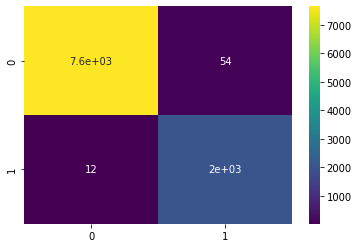

In [175]:
cnfm = confusion_matrix(y_true=y_test, y_pred=y_pred)
sn.heatmap(cnfm, annot=True, cmap="viridis")